In [9]:
pip install transformers torch torchvision matplotlib


Note: you may need to restart the kernel to use updated packages.


In [22]:
from transformers import AutoImageProcessor, ResNetForImageClassification
from PIL import Image
import torch
import requests

# Load processor and model
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

# Test on an image
image = Image.open("car.jpg")

# Preprocess image
inputs = processor(images=image, return_tensors="pt")

# Forward pass
with torch.no_grad():
    logits = model(**inputs).logits

# Get prediction
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])


Predicted class: sports car, sport car


Cosine Similarity: 0.7640553116798401
Forged Signature


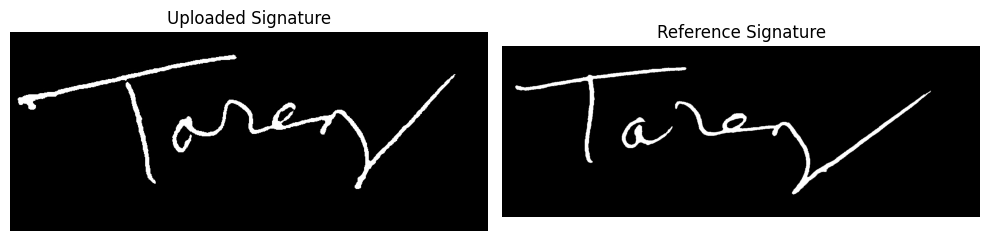

In [13]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE

# Load processor and model
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = AutoModel.from_pretrained("microsoft/resnet-50")

#def get_signature_vector(image_path):
    #image = Image.open(image_path).convert("RGB")
    #inputs = processor(images=image, return_tensors="pt")
    #with torch.no_grad():
        #features = model(**inputs).last_hidden_state
    # Pool to a fixed-size vector (e.g., mean pooling)
    #vector = features.mean(dim=1)

    # Suppose vectors is a list of signature vectors
    #tsne = TSNE(n_components=2)
    #reduced = tsne.fit_transform(vectors)

    #plt.scatter(reduced[:,0], reduced[:,1], c=labels)  # Labels: same/different person
    #plt.title("Signature vector space")
    #plt.show()

    
    #return vector.squeeze()  # shape: (2048,)

def get_signature_vector(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        features = model(**inputs).last_hidden_state  # shape: (1, 2048, 7, 7)
        pooled = torch.mean(features, dim=[2, 3])  # Global Average Pooling on H, W
    return pooled.squeeze()  # shape: (2048,)

#image Path
image_path_uploaded = "check_signature_test_case/process_signature/tareq_1.jpeg"
image_path_stored = "check_signature_test_case/process_signature/tareq_2.jpeg"

# Load two signatures
vec1 = get_signature_vector(image_path_uploaded)
vec2 = get_signature_vector(image_path_stored)

# Cosine similarity
similarity = F.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0)).item()
print("Cosine Similarity:", similarity)

if similarity >= 0.85:
    print("Genuine Signature")
else:
    print("Forged Signature")

# Cell 8: Visualize both images
uploaded_img = Image.open(image_path_uploaded)
stored_img = Image.open(image_path_stored)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(uploaded_img, cmap='gray')
axs[0].set_title("Uploaded Signature")
axs[0].axis('off')

axs[1].imshow(stored_img, cmap='gray')
axs[1].set_title("Reference Signature")
axs[1].axis('off')

plt.tight_layout()
plt.show()